In [13]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [14]:
# read csv using Pandas
df_OG = pd.read_csv('train.csv')
df_OG

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_x=df_OG.drop('label',axis=1)
df_y=df_OG['label']

In [16]:
labels = df_OG.iloc[:, 0]  # Assuming first column has the labels
print(labels.value_counts())  # Check distribution of digits

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [17]:
df_x.shape # 28 times 28 = 784

(42000, 784)

In [18]:
x_no_flat=df_x.values.reshape(-1,28,28,1)

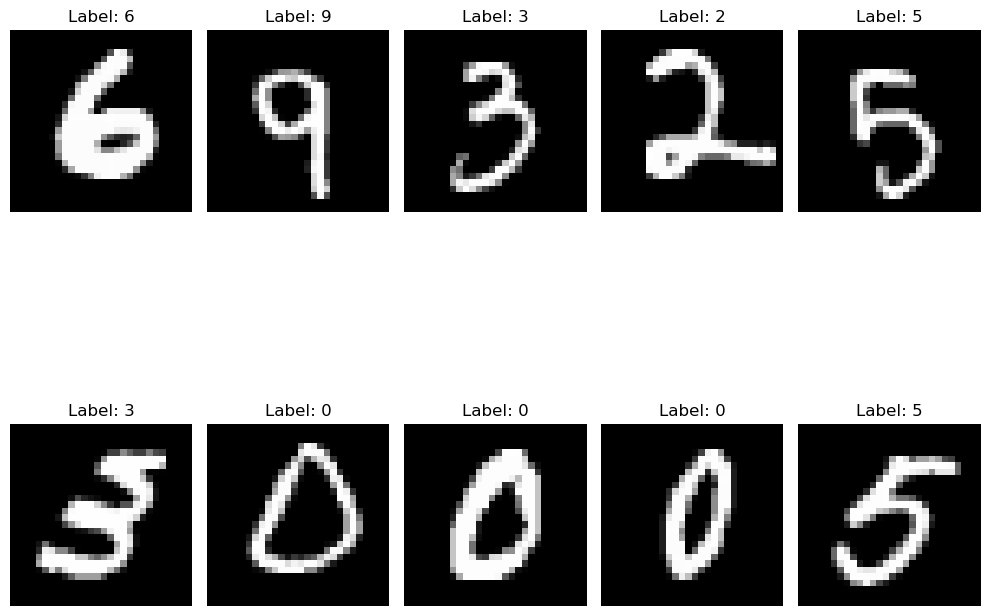

In [19]:
num_images = 10  # Number of images to display
indices = np.random.choice(df_OG.shape[0], num_images, replace=False)
images = x_no_flat[indices]
labels = y[indices]

# Create a grid of images
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for ax, img, label in zip(axes.flatten(), images, labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

In [20]:
####################################################
####################################################
def weights_incialization(units, type_inicilization):
    # inicializar listas vazias:
    Weights = [] 
    Biases = []
    mu, sigma = 0.1, 0.1**2

    type_inicialization = 'normal_distribution'
    
    if type_inicilization == 'random':
        for i in range(len(units)-1):
            w = 0.1 * np.random.randn(units[i+1], units[i])
            b = 0.1 * np.random.randn(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)
    elif type_inicilization == 'normal_distribution':
        for i in range(len(units)-1):
            w = np.random.normal(mu, sigma, size=(units[i+1], units[i]))
            #b = np.random.normal(mu, sigma, size=(units[i+1],1)).reshape(-1,1)
            b = np.zeros((units[i+1],1)).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)        
    
    else:
        for i in range(len(units)-1):
            w = 0.1 * np.ones((units[i+1], units[i]))
            b = 0.1 * np.ones(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)        
        
    return Weights, Biases
####################################################
####################################################





####################################################
####################################################
def activation_function(z):
    z = z.reshape(-1,1)
    # funcao de ativacao: ReLu
    h = z/2 + np.abs(z)/2
    #h = np.clip(z, 0, None)
    
    # funcao de ativacao: tangente hiperbolica:
    #h = np.tanh(z) # tanh
    return h
####################################################
####################################################

####################################################
####################################################
def diff_activation_function(h): # com base no valor de h
    h = h.reshape(-1,1)
    # Derivada da funçao de ativação: (Derivada da Relu)
    '''
    g_diff = np.zeros((h_i.shape[0],1))
    for k in range(h_i.shape[0]):
        g_diff[k] = 1 if h_i[k]>0 else 0
    '''
    g_diff = h
    g_diff[g_diff>0] = 1
    g_diff[g_diff<=0] = 0
    
    # Derivada da funçao de ativação (da tanh) 
    #g_diff = 1 - (h)**2
    
    
    return g_diff
####################################################
####################################################








####################################################
####################################################
def forward(x, Weights, Biases):
    Hiddens = []
    #Input Layer:
    x = x.reshape(-1,1) # entra a observacao, e so isso
    
    #1ª Hidden Layer: 
    h_i_min_1 = x # o que recebe da layer anterior
    z = Weights[0]@h_i_min_1 + Biases[0]
    #funcao de ativacao: ReLu
    h = activation_function(z)
    #print("h =",h.T)
    Hiddens.append(h)
    
    # Output Layer:
    h_i_min_1 = h # o que recebe da layer anterior
    z = Weights[1]@h_i_min_1 + Biases[1]
    z_out = z
            
    return z_out , Hiddens
####################################################
####################################################



####################################################
####################################################
def softmax(z):
    z = z.reshape(-1,1)
    m = z.max()
    soft = np.exp(z-m)/sum(np.exp(z-m))
    return soft
####################################################
####################################################




####################################################
####################################################
def backward( x, y, z_out, Hiddens, Weights, Biases):
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    
    # inicializar listas vazias:
    grad_Weights = []
    grad_Biases = []
    
    # -> Output Layer: 
    out = softmax(z_out) # softmax
    grad_z = out - y
    
    h_i_min_1 = Hiddens[0] # o que entra na layer anterior
    grad_w = grad_z @ h_i_min_1.T 
    grad_b = grad_z
    grad_Weights.append(grad_w)
    grad_Biases.append(grad_b)
    
    # -> Hidden Layer:
    grad_h = Weights[1].T @ grad_z
    h_i = Hiddens[0] # o que sai da funcao de ativacao depois desta layer

    # Derivada da funçao de ativação: (Derivada da Relu)
    z1 = Weights[0]@x + Biases[0]
    g_diff = diff_activation_function(z1)
    
    grad_z = grad_h * g_diff
    grad_w = grad_z @ x.T
    grad_b = grad_z  
    grad_Weights.append(grad_w)
    grad_Biases.append(grad_b)
    
    grad_Weights.reverse()
    grad_Biases.reverse()      

    return grad_Weights, grad_Biases   
####################################################
####################################################




####################################################
####################################################
def update_parameters(Weights, Biases, grad_Weights, grad_Biases, eta):
    num_layers = len(Weights)
    for i in range(num_layers):
        Weights[i] -= eta*grad_Weights[i]
        Biases[i] -= eta*grad_Biases[i]
####################################################
####################################################




####################################################
####################################################
def compute_loss(z_out, y, loss_function):
    z_out = z_out.reshape(-1,1)
    y = y.reshape(-1,1)

    # softmax transformation.
    out = np.exp(z_out) / np.sum(np.exp(z_out) )
    out = out.reshape(-1,1)
    
    #print("out =\n", out)
    #print("y =\n", y)
    Loss = -y.T@(np.log(out))
    return Loss 
####################################################
####################################################





####################################################
####################################################
def train_epoch(X, y, Weights, Biases, learning_rate):
    #raise NotImplementedError

    # One-hot Enconding: Encode labels as one-hot vectors.
    one_hot = np.zeros((y.size, y.max()+1))
    one_hot[np.arange(y.size), y] = 1
    y_one_hot = one_hot
    total_loss = 0
    
    for x_i, y_i in zip(X, y_one_hot): # Corre todas as observações 
        x_i = x_i.reshape(-1,1)
        y_i = y_i.reshape(-1,1)
        z_out , Hiddens = forward(x_i,Weights, Biases)
        grad_Weights, grad_Biases = backward( x_i, y_i, z_out, Hiddens, Weights, Biases)
        update_parameters(Weights, Biases, grad_Weights, grad_Biases, learning_rate)
        
        Loss = compute_loss(z_out, y_i, loss_function)
        total_loss += Loss
    print("Total loss: ", total_loss[0][0])    
    return total_loss
####################################################
####################################################






####################################################
####################################################
def predict(X, Weights, Biases):
    # Compute the forward pass of the network. At prediction time, there is
    # no need to save the values of hidden nodes, whereas this is required
    # at training time.
    
    #raise NotImplementedError

    y_hat = []
    for x_i in X:
        x_i = x_i.reshape(-1,1)
        z_out_i , _ = forward(x_i, Weights, Biases)
        
        # Fucao de ativacao da ultima camada: softmax
        out_i = softmax(z_out_i)
        y_hat_i = np.argmax(out_i)
        
        y_hat.append(y_hat_i)
        
    return y_hat
####################################################
####################################################



####################################################
####################################################
def evaluate(X, y, Weights, Biases):
    """
    X (n_examples x n_features)
    y (n_examples): gold labels
    """
    # Identical to LinearModel.evaluate()
    y_hat = predict(X, Weights, Biases)
    n_correct = (y == y_hat).sum()
    n_possible = y.shape[0]
    
    accuracy = n_correct / n_possible
    
    return accuracy
####################################################
####################################################



########################################################################
# Temos um problema de classificação, logo usaremos a SGD, com Loss: Cross Entropy e funcao de 
# ativacao softmax na ultima layer

'''
# One-hot Enconding: Encode labels as one-hot vectors.
one_hot = np.zeros((num_observacoes, num_labels))
for i in range(num_observacoes):
    one_hot[i, y[i]] = 1
y = one_hot 
'''



'\n# One-hot Enconding: Encode labels as one-hot vectors.\none_hot = np.zeros((num_observacoes, num_labels))\nfor i in range(num_observacoes):\n    one_hot[i, y[i]] = 1\ny = one_hot \n'

In [21]:
# ARQUITETURA DA NN:
# Single hidden unit MLP with 200 hidden units.
# First is input size, last is output size.
units = [784, 200, 10]

# Inicializar os pesos a zero:
# Initialize all weights and biases randomly.
type_inicialization = 'normal_distribution'
#type_inicialization = 'random'
Weights , Biases = weights_incialization(units, type_inicialization)

# Learning rate
learning_rate = 0.01 

loss_function = 'cross_entropy'

In [22]:

x = df_x.to_numpy()
x = x/255 # normalize the data
y = df_y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

EPOCHS = 20

train_accuracies = []
test_accuracies = []
Total_Loss = []

for E in range(EPOCHS):
    print("-> EPOCH:" ,E+1)
    
    # Treinar com os dados do train:
    total_loss = train_epoch(x_train, y_train, Weights, Biases, learning_rate)
    Total_Loss.append(total_loss[0][0]) 
    
    # Predict on training set and evaluate.
    acc = evaluate(x_train, y_train, Weights, Biases)
    print("train accuracy = ", acc)
    train_accuracies.append(acc) 
    
    # Predict on test set and evaluate.
    acc = evaluate(x_test, y_test, Weights, Biases)
    print("test accuracy = ", acc)
    test_accuracies.append(acc)  

-> EPOCH: 1


/var/folders/dn/hdz11q8j6s948t1shyxvbckm0000gn/T/ipykernel_31498/1248281439.py:189: RuntimeWarning: overflow encountered in exp
  out = np.exp(z_out) / np.sum(np.exp(z_out) )
/var/folders/dn/hdz11q8j6s948t1shyxvbckm0000gn/T/ipykernel_31498/1248281439.py:189: RuntimeWarning: invalid value encountered in divide
  out = np.exp(z_out) / np.sum(np.exp(z_out) )
/var/folders/dn/hdz11q8j6s948t1shyxvbckm0000gn/T/ipykernel_31498/1248281439.py:194: RuntimeWarning: divide by zero encountered in log
  Loss = -y.T@(np.log(out))
/var/folders/dn/hdz11q8j6s948t1shyxvbckm0000gn/T/ipykernel_31498/1248281439.py:194: RuntimeWarning: invalid value encountered in matmul
  Loss = -y.T@(np.log(out))


Total loss:  nan
train accuracy =  0.940952380952381
test accuracy =  0.9380952380952381
-> EPOCH: 2
Total loss:  5623.592923806962
train accuracy =  0.9637202380952381
test accuracy =  0.9532142857142857
-> EPOCH: 3
Total loss:  3894.8838965103005
train accuracy =  0.9717559523809524
test accuracy =  0.9594047619047619
-> EPOCH: 4
Total loss:  2949.3073063676443
train accuracy =  0.9799107142857143
test accuracy =  0.9633333333333334
-> EPOCH: 5
Total loss:  2246.962152609669
train accuracy =  0.9830059523809523
test accuracy =  0.9644047619047619
-> EPOCH: 6
Total loss:  1730.0578621753268
train accuracy =  0.9864285714285714
test accuracy =  0.9641666666666666
-> EPOCH: 7
Total loss:  1371.821664033417
train accuracy =  0.987172619047619
test accuracy =  0.9646428571428571
-> EPOCH: 8
Total loss:  1094.074238671715
train accuracy =  0.9879464285714286
test accuracy =  0.9639285714285715
-> EPOCH: 9
Total loss:  936.588261980718
train accuracy =  0.9912797619047619
test accuracy =  0

<function matplotlib.pyplot.show(close=None, block=None)>

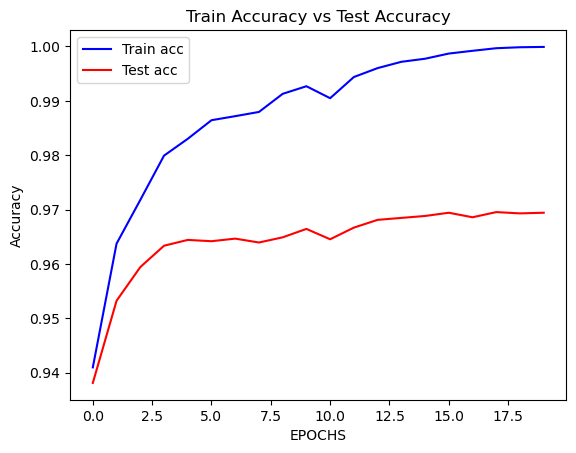

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(EPOCHS), train_accuracies, 'b-', label='Train acc')
plt.plot(range(EPOCHS), test_accuracies, 'r-', label='Test acc')
plt.ylabel('Accuracy')
plt.xlabel('EPOCHS')
plt.title('Train Accuracy vs Test Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

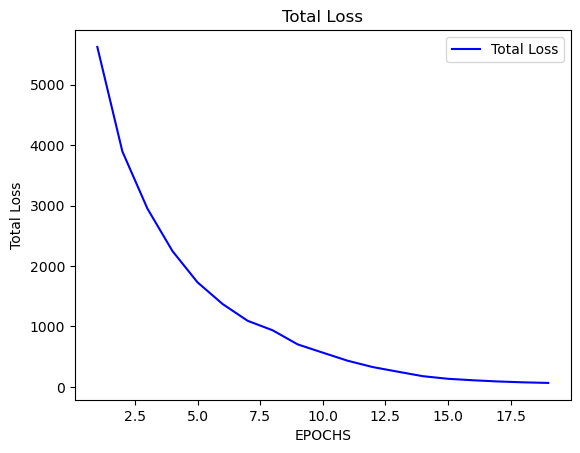

In [24]:
Total_Loss = np.array(Total_Loss)

plt.figure()
plt.plot(range(EPOCHS), Total_Loss.ravel(), 'b-', label='Total Loss')
plt.ylabel('Total Loss')
plt.xlabel('EPOCHS')
plt.title('Total Loss')
plt.legend()
plt.show